In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# AIM: To see how well bootstrapping performs in regards to estimating the population mean

In [3]:
pop_mean = 70
pop_size = 1_000_000_000
pop_std_dev = 6 

In [4]:
sample_size = 100
num_samples = 10_000

In [5]:
# Approach 1: Simulating taking num_samples random samples from the dataset

In [6]:
sample_means = np.random.normal(loc=pop_mean, scale=pop_std_dev, size=(num_samples, sample_size)).mean(axis=1)

In [7]:
# Approach 2: Taking a single sample and bootstrapping num_samples choices (with replacement) from it

In [8]:
sample_data = np.random.normal(loc=pop_mean, scale=pop_std_dev, size=(sample_size))

In [9]:
bootstrap_means = np.random.choice(sample_data, size=(num_samples, sample_size), replace=True).mean(axis=1)

In [10]:
data = pd.DataFrame({'Sample means': sample_means, 'Bootstrap means': bootstrap_means})

In [11]:
data

,Sample means,Bootstrap means
0,69.720326,69.884378
1,70.217778,69.840588
2,70.214308,68.768782
3,69.634489,69.333800
4,70.521810,69.749796
...,...,...
9995,69.642634,69.096221
9996,69.716404,69.809470
9997,71.128429,69.433759
9998,69.312884,68.855997


In [12]:
# Plot histogram of sample_means and bootstrap_means, along with a marker for pop_mean

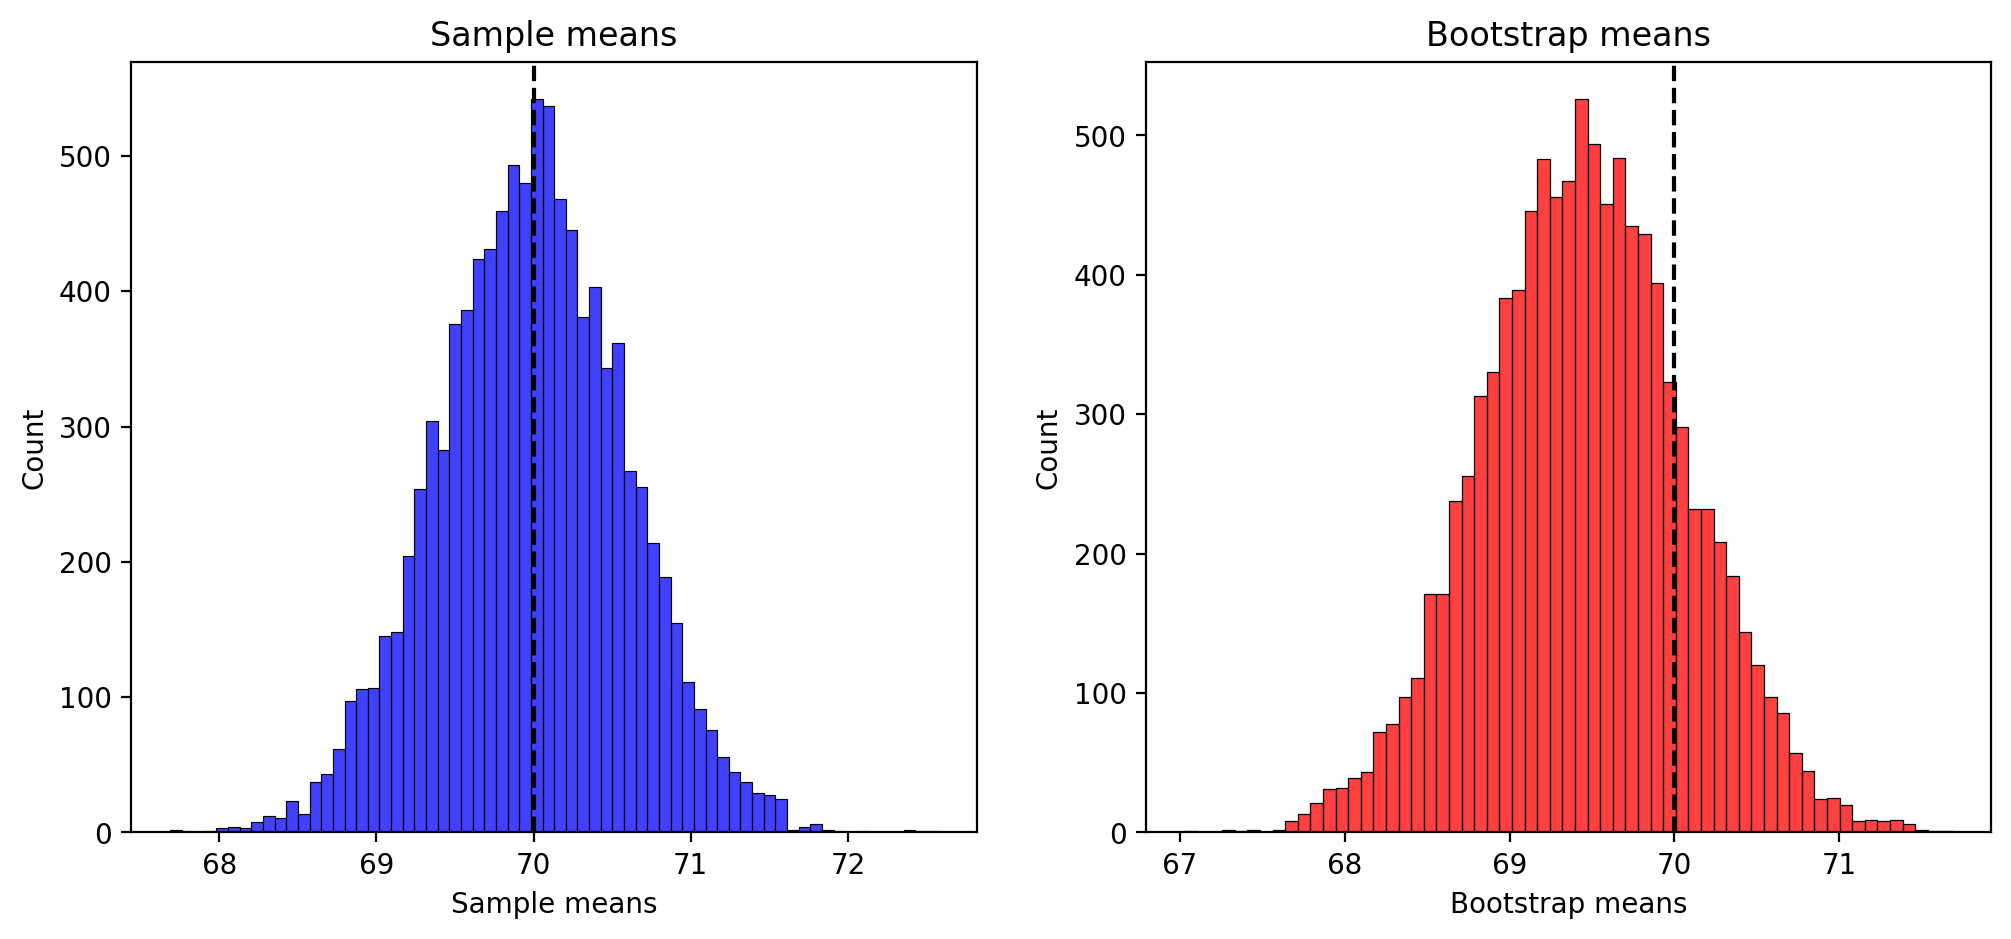

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=200)
colors = ['blue', 'red']
for i in range(2):
    column_name = data.columns[i]
    ax[i].set_title(column_name)
    sns.histplot(data, x=column_name, ax=ax[i], color=colors[i])
    ax[i].axvline(x=pop_mean, color='black', ls='--')

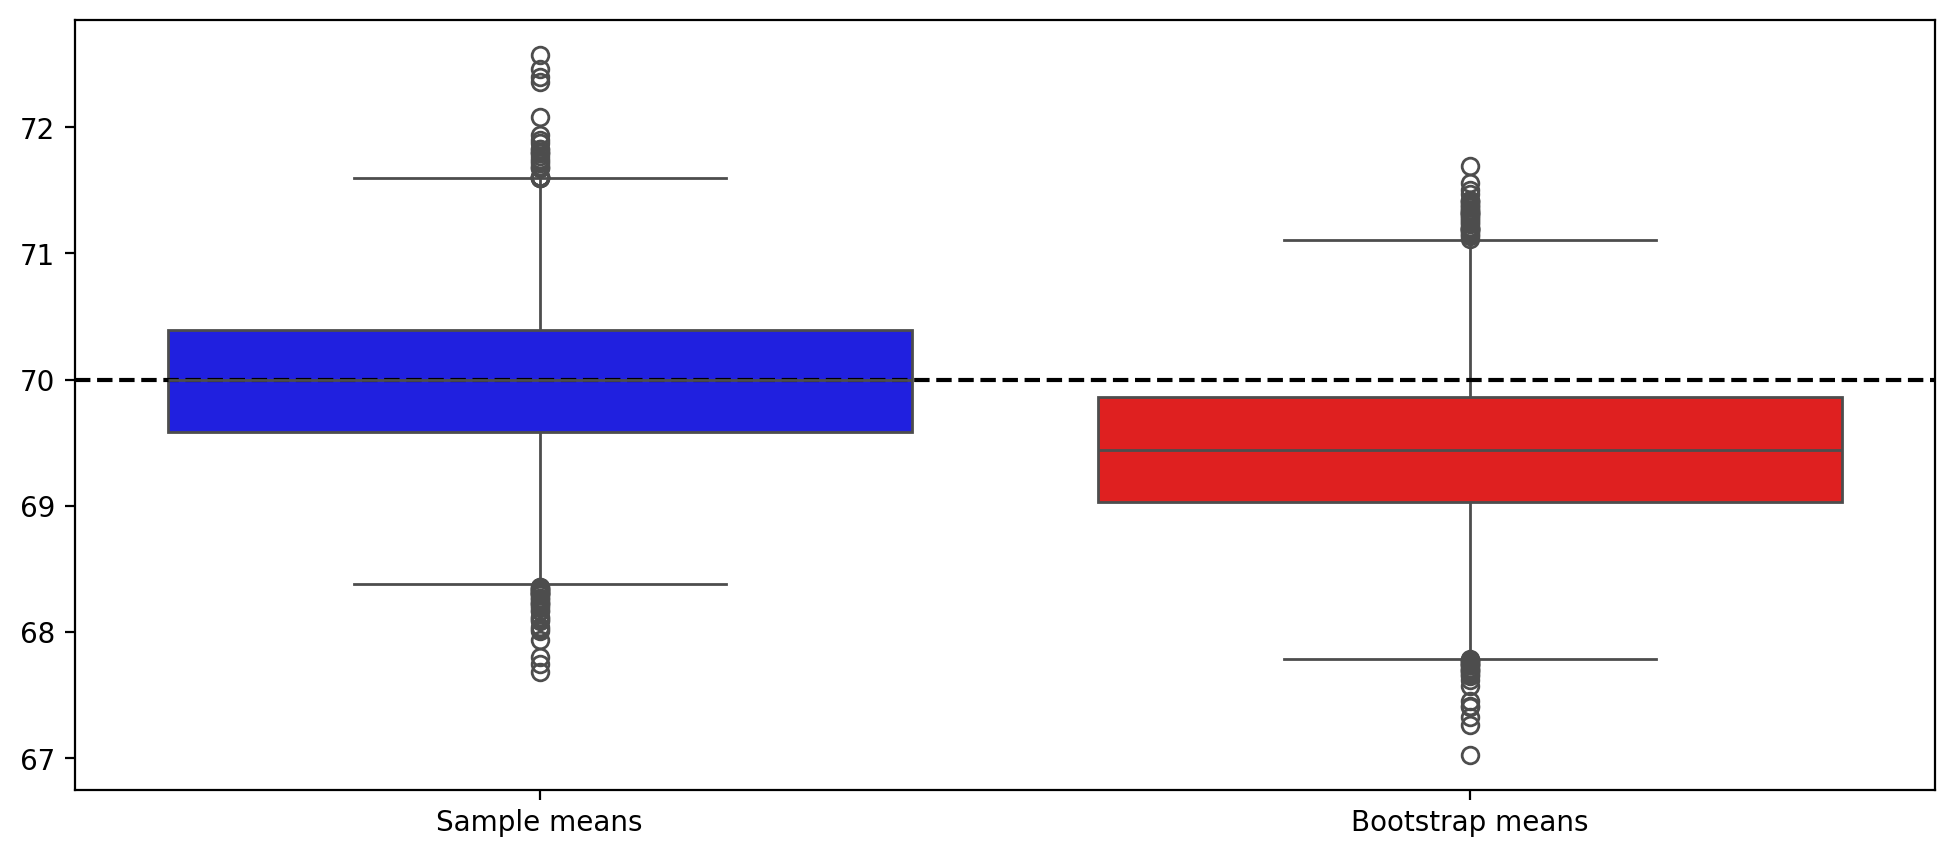

In [14]:
plt.figure(figsize=(12, 5), dpi=200)
sns.boxplot(data, palette=colors)
plt.axhline(y=pop_mean, color='black', ls='--')

In [15]:
sample_means.mean(), sample_means.std()

(69.98725712503949, 0.5951157300115596)

In [16]:
bootstrap_means.mean(), bootstrap_means.std()

(69.44985609523252, 0.6173730149315377)

In [17]:
# Therefore, we can see just how good of a technique bootstrapping is in this context